Iremos visualizar a diferença entre os agrupamentos realizado pela proximidade entre as características (KMeans) e por áreas com alta densidade (DBSCAN).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN

In [2]:
df = pd.read_csv('moons.csv', sep=',')
df.head()

,X,Y
0,-0.415208,1.035735
1,0.058781,0.304334
2,1.109379,-0.509738
3,1.540948,-0.427550
4,0.929095,-0.532388


Visualização dos dados originais.

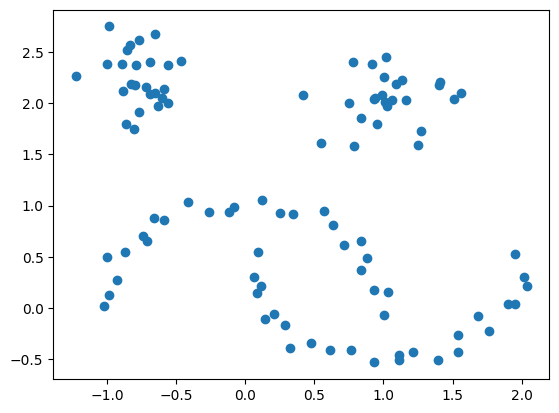

In [3]:
plt.scatter(df['X'], df['Y'])
plt.show()

Definição dos algoritmos.

In [4]:
km = KMeans(n_clusters=4, random_state=80)
db = DBSCAN(eps=0.4, min_samples=5)

Treinando e realizando a previsão sobre os pontos, para obter os clusters resultantes.

In [5]:
cluters_km = km.fit_predict(df)
cluters_db = db.fit_predict(df)

# Exibindo os resultados de um dos algoritmos
# Basicamente, retorna a qual cluster cada ponto pertence.
cluters_db

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 2, 2, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 2, 3, 3, 2,
       3, 3, 3, 2, 3, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3,
       2, 2, 3, 2, 2, 2, 3, 3, 3, 2, 3, 3])

In [6]:
df['label_kmeans'] = cluters_km
df['label_dbscan'] = cluters_db

Text(0.5, 1.0, 'DBSCAN')

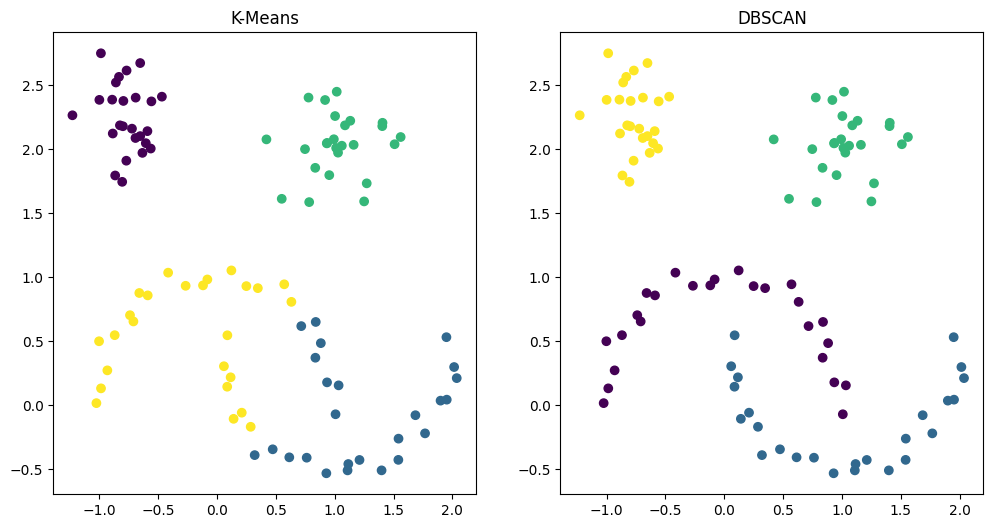

In [7]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(df['X'], df['Y'], c=df['label_kmeans']) # c significa: [C]luster
plt.title("K-Means")

plt.subplot(1,2,2)
plt.scatter(df['X'], df['Y'], c=df['label_dbscan'])
plt.title("DBSCAN")

Podemos observar que a escolha da técnica influencia a formação dos clusteres. Como esperado, o K-Means sugere grupos por pontos mais próximos, enquanto o DBSCAN leva em consideração a densidade e distribuição dos dados.

### Agrupando consumidores e detectando padrões de compras

In [8]:
df = pd.read_csv('mall.csv', sep=',')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Gráficos de dispersão para cada variável.

É possível observar que a relação entre Ganhos anuais (Annual Income) e Gastos (Spending Score) forma um padrão

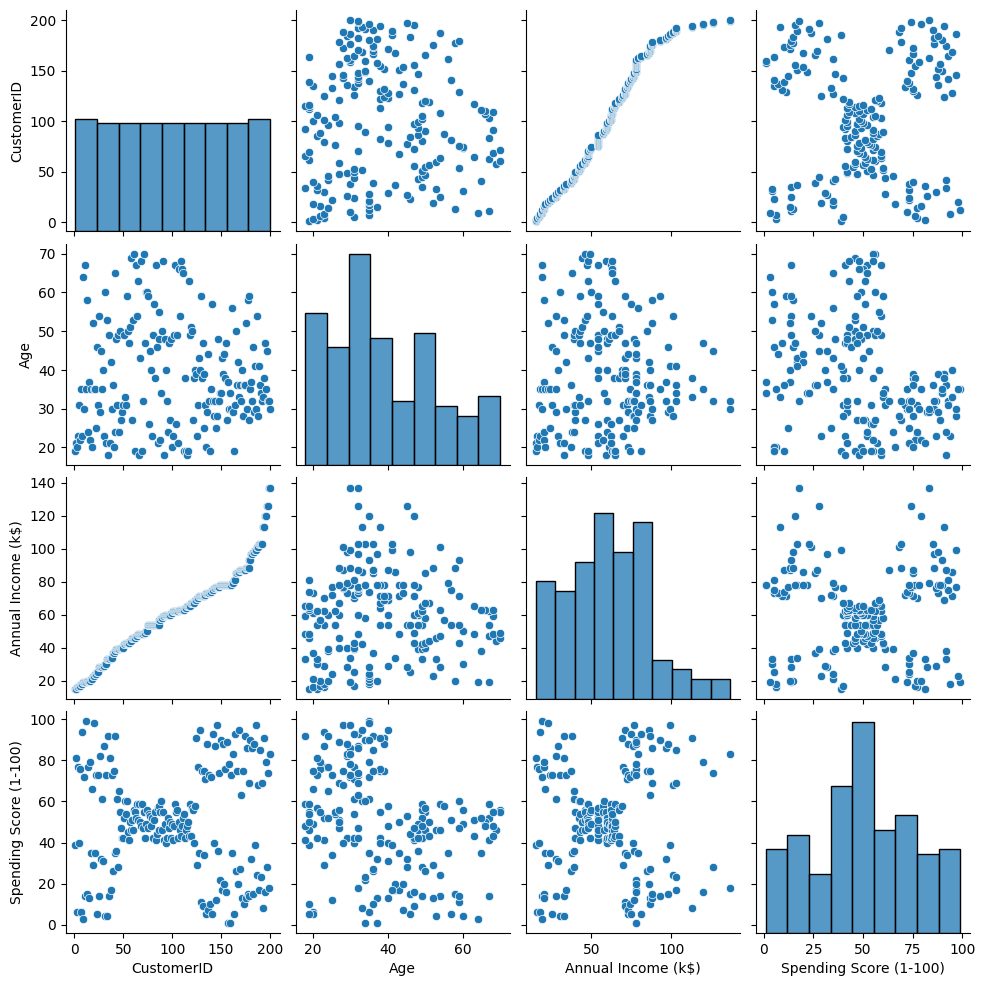

In [10]:
sns.pairplot(df)

Iremos começar com o algoritmo K-Means e utilizar os campos de *Annual Income* e *Spending Score* para a criação dos clusteres.

Iremos realizar primeiramente o **método do cotovelo** para definirmos o melhor número de clusters.

O método do cotovelo se baseia que no menor número de inércia onde ocorre a forma de "cotovelo" no gráfico, significa o número ideal de clusters.

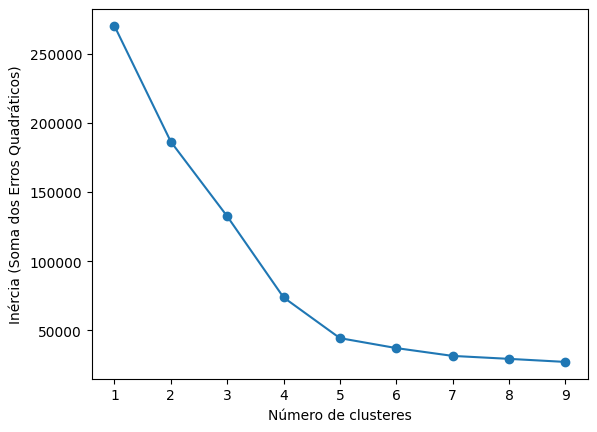

In [11]:
k = list(range(1,10))
inertia = []
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=80)
    kmeans.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia.append(kmeans.inertia_)


plt.plot(k, inertia, '-o')
plt.xlabel("Número de clusteres")
plt.ylabel("Inércia (Soma dos Erros Quadráticos)")
plt.show()

Podemos observar que o número ideal de clusteres é 5.

In [12]:
kmeans = KMeans(n_clusters=5, random_state=80)
kmeans.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])

KMeans(n_clusters=5, random_state=80)

In [13]:
# Obtém os centróides
centroids = kmeans.cluster_centers_ # Coordenadas de cada centroide (centro do cluster)
centroids 

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

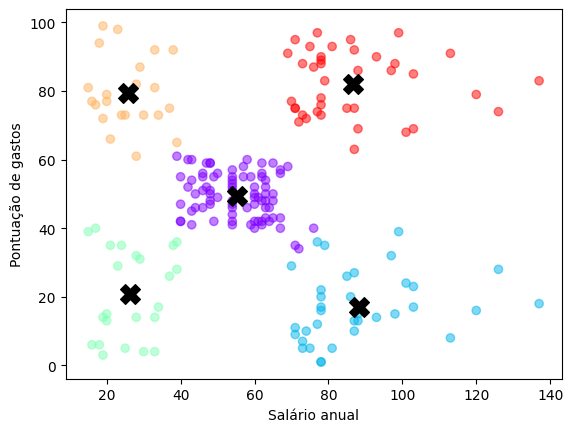

In [14]:
# Preve as os grupos de cada ponto e salva em uma variável
kmeans_labels = kmeans.predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])

# Exibe a clusterização
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], # Eixo X e Y
            c=kmeans_labels,
            alpha=0.5, # Transparência dos pontos
            cmap='rainbow') # Paleta de cores
plt.xlabel('Salário anual')
plt.ylabel('Pontuação de gastos')

# Exibe os centroids
plt.scatter(centroids[:,0], # Eixo X do centroide
            centroids[:,1], # Eixo Y do centroide
            c='black', # Todos os centroides são pretos
            marker='X', # Marcação como um "X"
            s=200) # Tamanho da marcação

Agora vamos explorar os dados pela ótica do **DBSCAN**.

No retorno do DBSCAN, o cluster **-1** indica **outliers**.

In [15]:
dbscan = DBSCAN(eps=10, min_samples=8)
dbscan.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])

dbscan_labels = dbscan.labels_
dbscan_labels

array([-1,  0,  1,  0, -1,  0,  1, -1,  1,  0, -1, -1, -1,  0,  1,  0, -1,
        0, -1, -1, -1,  0,  1,  0,  1,  0, -1, -1,  2,  0,  1,  0,  1, -1,
       -1,  0, -1,  0,  2, -1,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  2,  3,  2,  3,  4,  3,  4,  3,  2,  3,  4,  3,
        4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,
        3,  4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,  3,  4, -1,
        4,  3,  4,  3,  4,  3,  4,  3,  4,  3, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

Text(0, 0.5, 'Pontuação de gastos')

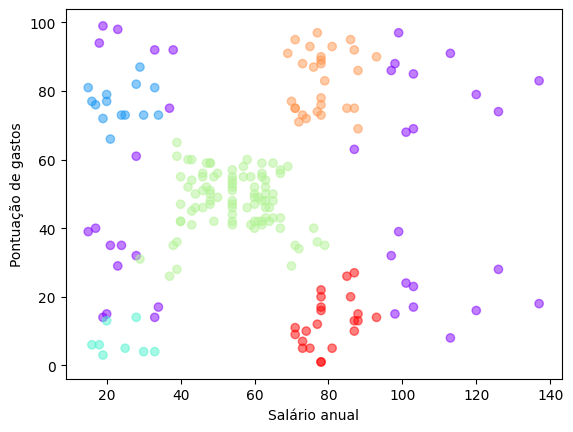

In [16]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
            c=dbscan_labels,
            alpha=0.5,
            cmap='rainbow')
plt.xlabel('Salário anual')
plt.ylabel('Pontuação de gastos')

Podemos visualizar apenas os dados que **não são outliers** ou vice versa.

Removendo os outliers (cluster "-1").

Text(0, 0.5, 'Pontuação de gastos')

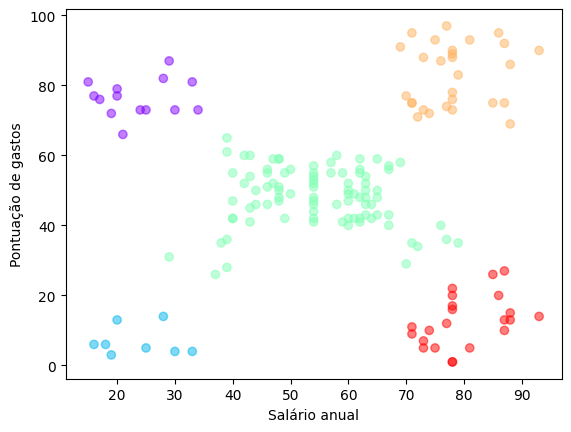

In [18]:
mascara = dbscan_labels >= 0 # Array de true e falses
plt.scatter(df['Annual Income (k$)'][mascara], df['Spending Score (1-100)'][mascara],
            c=dbscan_labels[mascara],
            alpha=0.5,
            cmap='rainbow')
plt.xlabel('Salário anual')
plt.ylabel('Pontuação de gastos')

No gráfico acima podemos observar alguns padrões:
- Canto superior esquerdo: pessoas que recebem pouco e gastam muito.
- Canto inferior esquerdo: pessoas que recebem pouco e gastam pouco.
- Canto superior direito: pessoas que recebem muito e gastam muito.
- Canto inferior direito: pessoas que recebem muito e gastam pouco.